<a href="https://colab.research.google.com/github/praveenmech057/MLproject/blob/main/Dimond_price_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

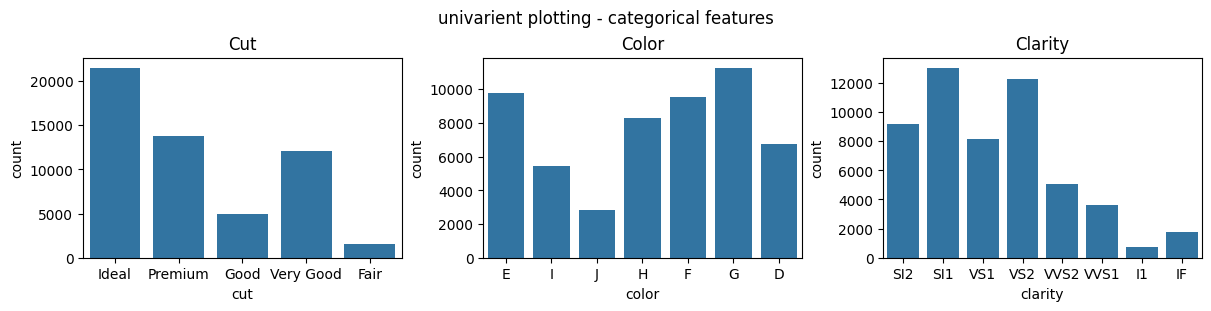

In [ ]:
#univarient - categorical analysis
fig,axs = plt.subplots(1,3,figsize = (12,3),constrained_layout=True)
fig.suptitle("univarient plotting - categorical features")

axs[0].set_title("Cut")
sns.countplot(data= df,x='cut',ax=axs[0])

axs[1].set_title("Color")
sns.countplot(data= df,x='color',ax=axs[1])

axs[2].set_title("Clarity")
sns.countplot(data= df,x='clarity',ax=axs[2])

<Axes: title={'center': 'Clarity vs Price'}, xlabel='price', ylabel='clarity'>

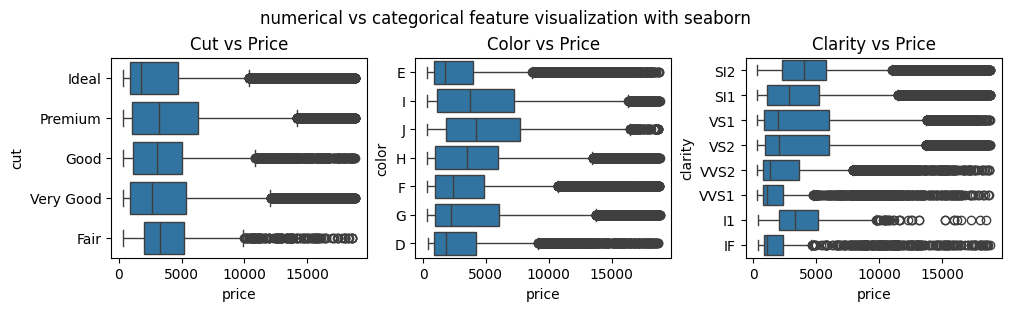

In [ ]:
# Bivarient - categorical vs numerical anaylsis

fig,axs = plt.subplots(1,3,figsize=(10,3),constrained_layout= True)
fig.suptitle("numerical vs categorical feature visualization with seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df,x='price',y='cut',ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot (data=df,x='price',y='color',ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df,x='price',y='clarity',ax=axs[2])

In [ ]:
import sklearn
print (sklearn.__version__)

1.6.1


In [ ]:
x= df.drop(columns=['price'])
y=df['price']


In [ ]:
x= df[["cut","color","clarity","carat"]]
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train.dtypes

,0
cut,object
color,object
clarity,object
carat,float64


In [ ]:
x_train_cat=x_train.select_dtypes(include=['object'])
x_train_num=x_train.select_dtypes(include=['int64','float64'])

In [ ]:
x_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [ ]:
x_train_num.head()

,carat
441,0.89
50332,0.70
35652,0.31
9439,0.90
15824,1.01


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale=MinMaxScaler()

x_train_num_transformed=pd.DataFrame(minmax_scale.fit_transform(x_train_num),columns=minmax_scale.get_feature_names_out(),index=x_train_num.index)
x_train_num_transformed.head()

,carat
441,0.143451
50332,0.103950
35652,0.022869
9439,0.145530
15824,0.168399


In [ ]:
x_train_num_transformed.describe().round(2)

,carat
count,40455.00
mean,0.12
std,0.10
min,0.00
25%,0.04
50%,0.10
75%,0.17
max,1.00


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

x_train_num_transformed=pd.DataFrame(std_scaler.fit_transform(x_train_num),columns=std_scaler.get_feature_names_out(),index=x_train_num.index)
x_train_num_transformed.head()

,carat
441,0.194920
50332,-0.205679
35652,-1.027961
9439,0.216004
15824,0.447930


In [ ]:
x_train_num_transformed.describe().round(2)

,carat
count,40455.00
mean,-0.00
std,1.00
min,-1.26
25%,-0.84
50%,-0.21
75%,0.51
max,8.88


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")

x_train_cat_transformed = pd.DataFrame(onehot_encoder.fit_transform(x_train_cat),columns=onehot_encoder.get_feature_names_out(),index=x_train_cat.index)
x_train_cat_transformed.describe().round(2)

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.0,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.03,0.09,0.40,0.25,0.22,0.13,0.18,0.18,0.21,0.15,0.1,0.05,0.01,0.03,0.24,0.17,0.15,0.23,0.07,0.09
std,0.17,0.29,0.49,0.44,0.42,0.33,0.39,0.38,0.41,0.36,0.3,0.22,0.12,0.18,0.43,0.38,0.36,0.42,0.25,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
example_df=({'Rating':['excellent','Average','Bad','average','Execellent','Bad','Good','Good']})
example_df

{'Rating': ['excellent',
  'Average',
  'Bad',
  'average',
  'Execellent',
  'Bad',
  'Good',
  'Good']}

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

example_df['Rating' - 'Label encoded']=label_encoder.fit_transform(example_df['Rating'])
example_df

TypeError: unsupported operand type(s) for -: 'str' and 'str'